In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Data preprocessing and feature engineering

In [2]:
movies=pd.read_csv("movies.csv")

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738336 entries, 0 to 738335
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    738336 non-null  int64  
 1   title                 738332 non-null  object 
 2   genres                519713 non-null  object 
 3   original_language     738336 non-null  object 
 4   overview              618328 non-null  object 
 5   popularity            738336 non-null  float64
 6   production_companies  342642 non-null  object 
 7   release_date          682898 non-null  object 
 8   budget                738336 non-null  float64
 9   revenue               738336 non-null  float64
 10  runtime               700752 non-null  float64
 11  status                738336 non-null  object 
 12  tagline               109432 non-null  object 
 13  vote_average          738336 non-null  float64
 14  vote_count            738336 non-null  float64
 15  

In [4]:
movies.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,4594.775,Marvel Studios,2022-11-09,250000000.0,330000000.0,162.0,Released,Forever.,7.593,473.0,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...,hero-sequel-superhero-based on comic-duringcre...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,/8sMmAmN2x7mBiNKEX2o0aOTozEB.jpg,436270-785084-928123-663712-555604-615952-7441...
1,663712,Terrifier 2,Horror-Thriller,en,After being resurrected by a sinister entity A...,4528.571,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,2022-10-06,250000.0,10155347.0,138.0,Released,Who's laughing now?,6.963,585.0,Lauren LaVera-David Howard Thornton-Elliott Fu...,clown-halloween-resurrection-sequel-gore-slash...,/b6IRp6Pl2Fsq37r9jFhGoLtaqHm.jpg,/y5Z0WesTjvn59jP6yo459eUsbli.jpg,436270-732459-928123-575322-675054-420634-6427...
2,436270,Black Adam,Action-Fantasy-Science Fiction,en,Nearly 5000 years after he was bestowed with t...,4328.431,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,319000000.0,125.0,Released,The world needed a hero. It got Black Adam.,6.900,1060.0,Dwayne Johnson-Aldis Hodge-Noah Centineo-Sarah...,lightning-anti hero-superhero-based on comic-d...,/3zXceNTtyj5FLjwQXuPvLYK5YYL.jpg,/bQXAqRx2Fgc46uCVWgoPz5L5Dtr.jpg,663712-49046-642721-963954-365297-887731-63113...
3,829280,Enola Holmes 2,Mystery-Adventure-Crime,en,Now a detective-for-hire like her infamous bro...,4081.058,Legendary Pictures-PCMA Productions,2022-11-04,0.0,0.0,129.0,Released,The sequel is afoot!,7.744,765.0,Millie Bobby Brown-Henry Cavill-Louis Partridg...,detective-victorian england-sequel-female dete...,/tegBpjM5ODoYoM1NjaiHVLEA0QM.jpg,/zzoFeH4PsV5Mh2Sc47JOMFwGYOX.jpg,49046-226354-746062-746048-626276-51310-541134...
4,675054,MexZombies,Horror-Action-Comedy,es,A group of teenagers must face a zombie apocal...,3401.452,Draco Films,2022-10-26,0.0,0.0,93.0,Released,NaN,7.415,53.0,Bárbara de Regil-Iñaki Godoy-Sara Maldonado-Vi...,NaN,/pTxw4GFE3ZfzJfvuUsPyD5njAuI.jpg,/b2FxWOxe9K7ZZ1uaPOze2RJ1ajq.jpg,NaN


In [5]:
#Drop unuseful columns
movies=movies.drop(['id','overview','poster_path','production_companies','backdrop_path','recommendations'], axis=1)

In [6]:
movies['status'].unique()

array(['Released', 'Post Production', 'In Production', 'Planned',
       'Canceled', 'Rumored'], dtype=object)

In [7]:
#Select only released movies
movies_released=movies.query('status == "Released"')
movies_released=movies_released.drop('status',axis=1)

In [8]:
#Convert the format of release_date column
movies_released['release_date']=pd.to_datetime(movies_released['release_date'])

In [9]:
#Select movies between 2000 to 2020
movies= movies_released[(movies_released['release_date'] < "2020-01-01")& (movies_released['release_date'] >= '2000-01-01')]

In [10]:
movies.duplicated().sum()

90

In [11]:
#Drop duplicate records
movies.drop_duplicates(inplace=True)
movies.duplicated().sum()

0

In [12]:
#Replace the NA with 0 and No-NA with 1 in tagline column
movies['has_tagline']=movies['tagline'].notnull().astype('int')

In [13]:
#calculate the number of words in tagline for each movie
movies['tagline_words']= movies['tagline'].astype(str).str.split().str.len()

In [14]:
#Deal with missing data
movies.isnull().sum()

title                     1
genres                94460
original_language         0
popularity                0
release_date              0
budget                    0
revenue                   0
runtime               17391
tagline              291233
vote_average              0
vote_count                0
credits              106991
keywords             237040
has_tagline               0
tagline_words             0
dtype: int64

In [15]:
movies.dropna(inplace=True)

In [16]:
#Drop the abnormal data(budget and revenue are all zero)
movies=movies.query('budget>0 & revenue>0')

<AxesSubplot:xlabel='runtime'>

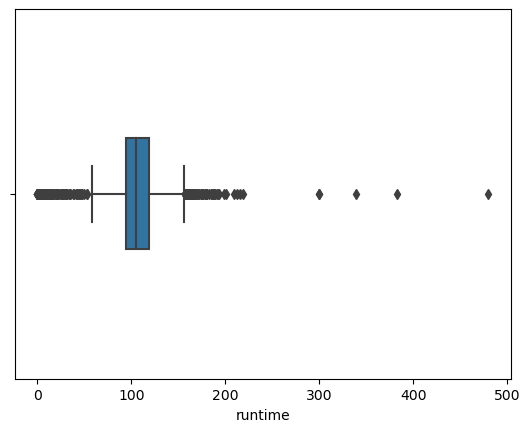

In [17]:
#Detect and remove outliers in runtime and popularity
sns.boxplot(movies['runtime'],width=0.3)

In [18]:
movies=movies.query('runtime<300')

<AxesSubplot:xlabel='popularity'>

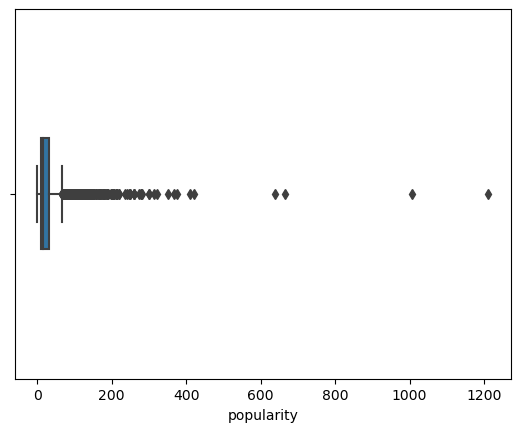

In [19]:
sns.boxplot(movies['popularity'],width=0.3)

In [20]:
movies=movies.query('popularity<600')

<AxesSubplot:xlabel='vote_count'>

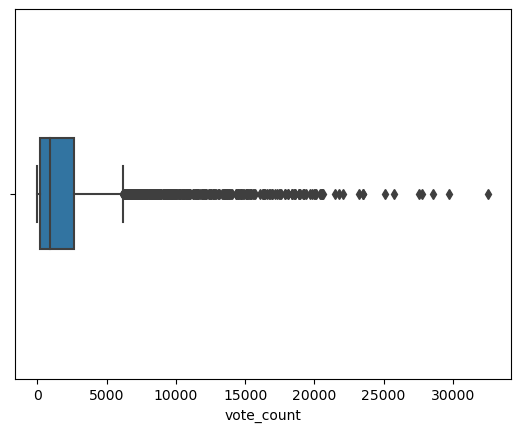

In [21]:
sns.boxplot(movies['vote_count'],width=0.3)

In [22]:
movies=movies.query('vote_count<20000')

In [23]:
#take the log of revenue and budget
movies['log_revenue'] = np.log(movies['revenue'])
movies['log_budget'] = np.log(movies['budget'])

In [24]:
movies['credits']=movies['credits'].astype(str).str.split('-')
movies['credits']

123       [Dakota Fanning, Teri Hatcher, Keith David, Je...
136       [Daniel Radcliffe, Rupert Grint, Emma Watson, ...
148       [Anna Faris, Jon Abrahams, Marlon Wayans, Shaw...
159       [Daniel Radcliffe, Rupert Grint, Emma Watson, ...
164       [Andrew Garfield, Sam Worthington, Vince Vaugh...
                                ...                        
716684    [Humayun Saeed, Sheheryar Munawar Siddiqui, Sy...
728969    [Andreo Chimal, Otoniel Noris, Emmanuel López,...
729507    [Mohammad Ali Gerami, Hadis Eftekhari, Aamin R...
730121                     [BID, Manoj Kumar, Prachi Uppal]
731786                     [Paras Gola, Ron Devil, Khayaal]
Name: credits, Length: 4291, dtype: object

In [25]:
#Create a new column to show the first credit person
movies['credit_first']=movies['credits'].str[0]

In [26]:
movies['original_language'].value_counts().head()

en    3655
hi     113
es      80
fr      71
ko      61
Name: original_language, dtype: int64

In [27]:
#Transform the language column to represent if the language is English
movies.loc[movies['original_language']=='en', 'original_language'] = 1
movies.loc[movies['original_language']!='en', 'original_language'] = 0

In [28]:
movies['original_language'].value_counts().head()

0    4291
Name: original_language, dtype: int64

In [29]:
#alculate the number of keywords for each movie
movies['keywords_num']=movies['keywords'].astype(str).str.split('-').str.len()

In [30]:
#alculate the number of words in title for each movie
movies['title_num']=movies['title'].astype(str).str.split('-').str.len()

In [31]:
movies.head()

,title,genres,original_language,popularity,release_date,budget,revenue,runtime,tagline,vote_average,vote_count,credits,keywords,has_tagline,tagline_words,log_revenue,log_budget,credit_first,keywords_num,title_num
123,Coraline,Animation-Family-Fantasy,0,410.378,2009-02-05,60000000.0,1.246000e+08,100.0,Be careful what you wish for.,7.806,6133.0,"[Dakota Fanning, Teri Hatcher, Keith David, Je...",based on novel or book-dream-eye-stop motion-s...,1,6,18.640619,17.909855,Dakota Fanning,11,1
136,Harry Potter and the Chamber of Secrets,Adventure-Fantasy,0,374.453,2002-11-13,100000000.0,8.766885e+08,161.0,Hogwarts is back in session.,7.726,18919.0,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",flying car-witch-sword-magic-diary-child hero-...,1,5,20.591662,18.420681,Daniel Radcliffe,15,1
148,Scary Movie,Comedy,0,351.270,2000-07-07,19000000.0,2.780198e+08,88.0,No mercy. No shame. No sequel.,6.314,5793.0,"[Anna Faris, Jon Abrahams, Marlon Wayans, Shaw...",garage-psychopath-high school-satire-parody-cr...,1,6,19.443203,16.759950,Anna Faris,10,1
159,Harry Potter and the Deathly Hallows: Part 2,Fantasy-Adventure,0,321.693,2011-07-07,125000000.0,1.341511e+09,130.0,It all ends here.,8.116,17902.0,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",saving the world-witch-self sacrifice-magic-dy...,1,4,21.017063,18.643824,Daniel Radcliffe,13,1
164,Hacksaw Ridge,Drama-History-War,0,312.359,2016-10-07,40000000.0,1.753024e+08,139.0,One of the greatest heroes in American history...,8.190,11567.0,"[Andrew Garfield, Sam Worthington, Vince Vaugh...",japan-world war ii-violent father-pacifism-bib...,1,12,18.982023,17.504390,Andrew Garfield,18,1


In [45]:
#create dummy variables
movies_enc = pd.get_dummies(movies, columns = ['genres','credit_first'])

In [46]:
movies_enc.shape

(4291, 3116)

In [34]:
movies_enc.head()

,title,original_language,popularity,release_date,budget,revenue,runtime,tagline,vote_average,vote_count,...,genres_Western-Action-Thriller-Drama,genres_Western-Adventure-Action,genres_Western-Animation-Adventure-Comedy-Family-Drama,genres_Western-Crime-Thriller,genres_Western-Drama,genres_Western-Drama-Action,genres_Western-Drama-Adventure,genres_Western-Drama-Comedy,genres_Western-Drama-History,genres_Western-History-War-Drama
123,Coraline,0,410.378,2009-02-05,60000000.0,1.246000e+08,100.0,Be careful what you wish for.,7.806,6133.0,...,0,0,0,0,0,0,0,0,0,0
136,Harry Potter and the Chamber of Secrets,0,374.453,2002-11-13,100000000.0,8.766885e+08,161.0,Hogwarts is back in session.,7.726,18919.0,...,0,0,0,0,0,0,0,0,0,0
148,Scary Movie,0,351.270,2000-07-07,19000000.0,2.780198e+08,88.0,No mercy. No shame. No sequel.,6.314,5793.0,...,0,0,0,0,0,0,0,0,0,0
159,Harry Potter and the Deathly Hallows: Part 2,0,321.693,2011-07-07,125000000.0,1.341511e+09,130.0,It all ends here.,8.116,17902.0,...,0,0,0,0,0,0,0,0,0,0
164,Hacksaw Ridge,0,312.359,2016-10-07,40000000.0,1.753024e+08,139.0,One of the greatest heroes in American history...,8.190,11567.0,...,0,0,0,0,0,0,0,0,0,0


## EDA

In [35]:
movies['genres'].value_counts().head(20)

Drama                               250
Comedy                              208
Drama-Romance                       123
Comedy-Romance                      116
Comedy-Drama                        108
Horror-Thriller                      88
Comedy-Drama-Romance                 80
Action-Drama                         73
Drama-Thriller                       57
Documentary                          56
Horror                               50
Drama-History                        45
Action-Thriller                      44
Drama-Comedy                         39
Action-Crime-Thriller                37
Crime-Drama-Thriller                 36
Romance-Drama                        28
Action-Comedy                        26
Action-Adventure-Science Fiction     26
Action-Comedy-Crime                  26
Name: genres, dtype: int64

Text(0.5, 1.0, 'Distribution of runtime of movies')

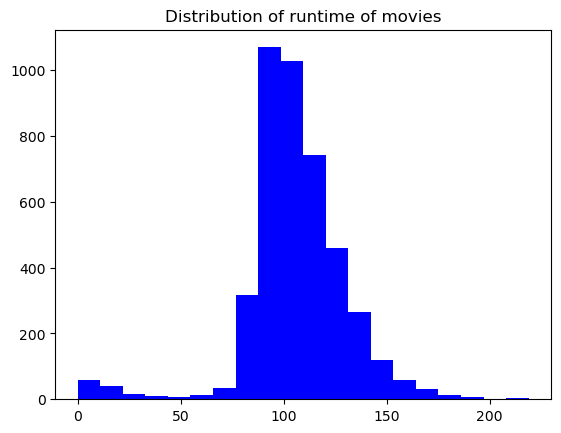

In [36]:
plt.hist(movies['runtime'], color = 'blue',bins = int(20))
plt.title('Distribution of runtime of movies')

Text(0.5, 1.0, 'Movie Budget Over Revenue Distribution')

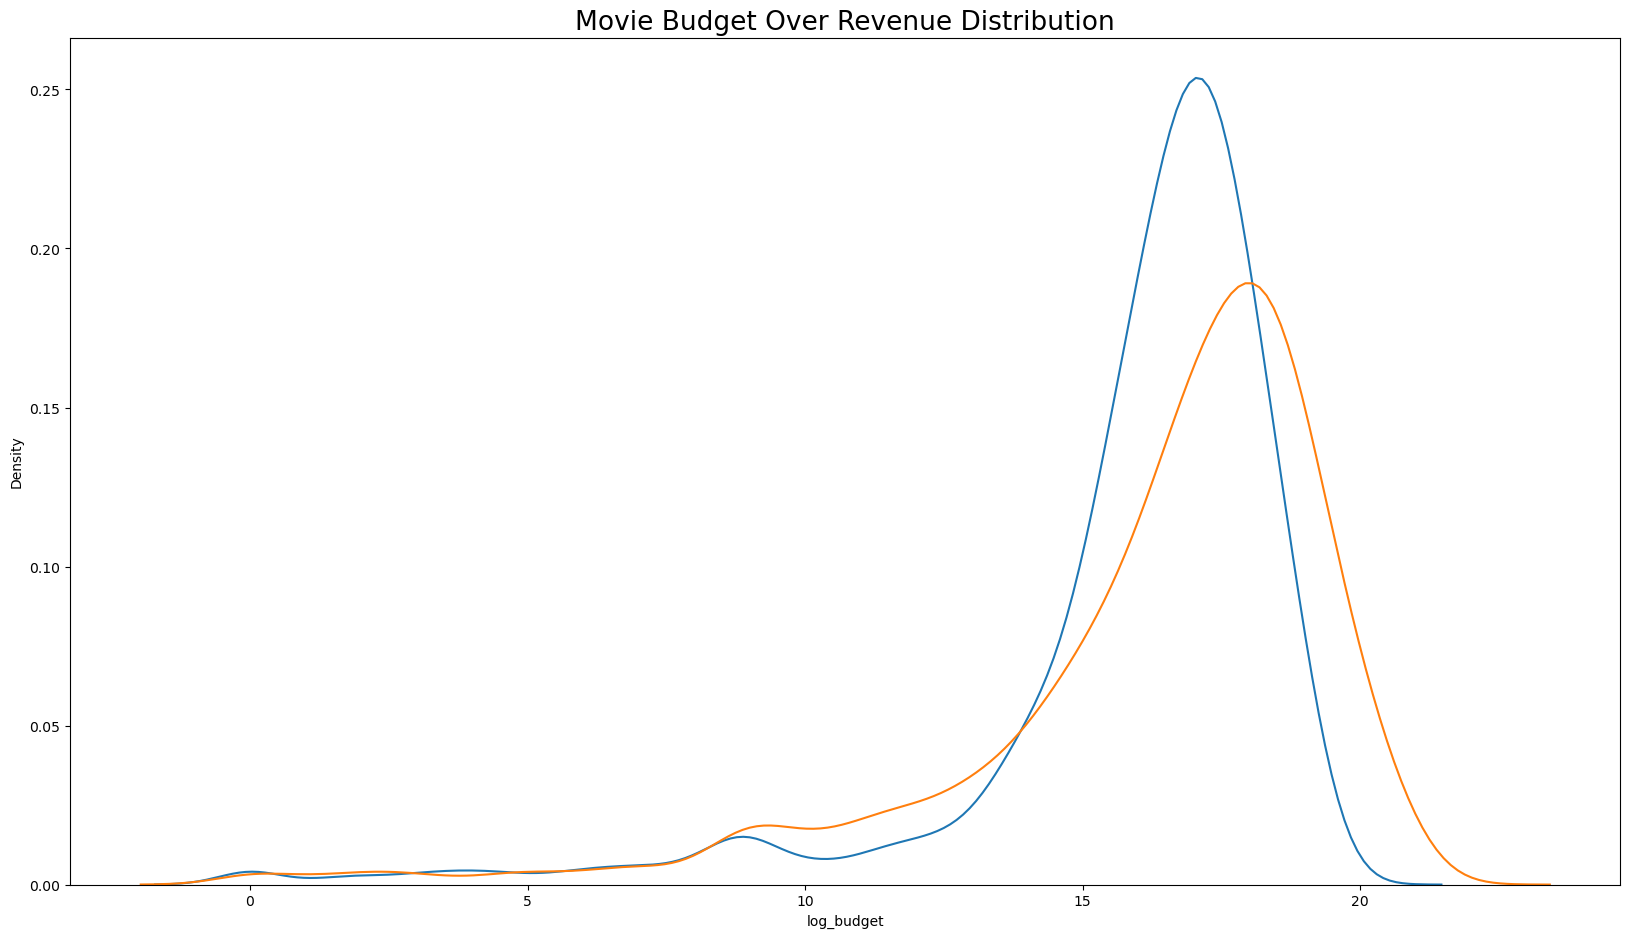

In [37]:
plt.figure(figsize=(20,11))
ax = sns.kdeplot(movies['log_budget'],label='Budget')
ax = sns.kdeplot(movies['log_revenue'],label='Revenue')
ax.set_title('Movie Budget Over Revenue Distribution',fontsize=19)

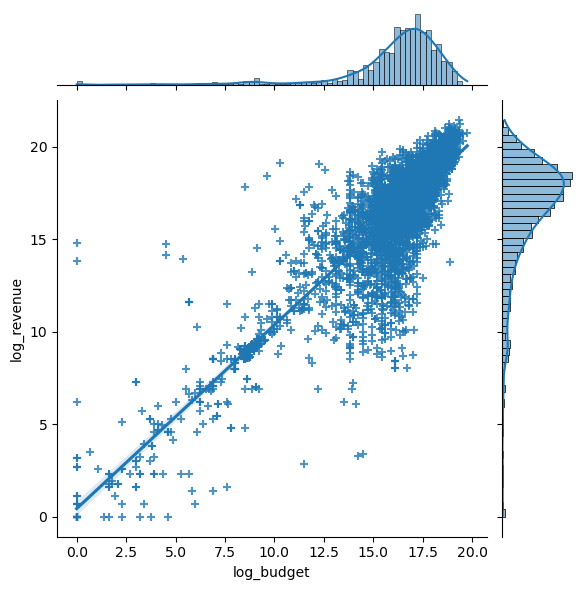

In [38]:
ax=sns.jointplot(data=movies, x='log_budget', y='log_revenue',kind="reg",marker="+")

Text(0.5, 1.0, 'Movie Popularity Distribution')

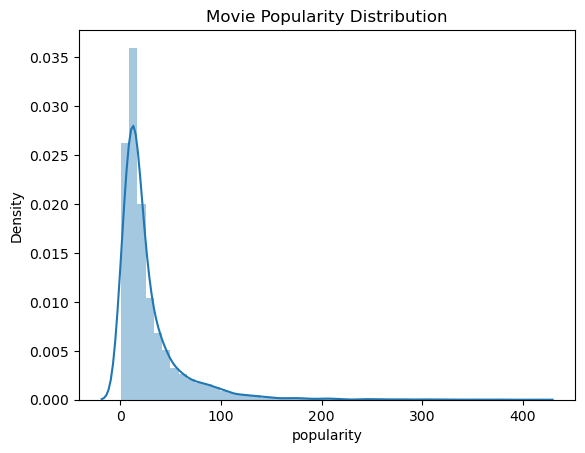

In [39]:
ax = sns.distplot(movies['popularity'])
ax.set_title('Movie Popularity Distribution')

Text(0.5, 1.0, 'Movie votes Distribution')

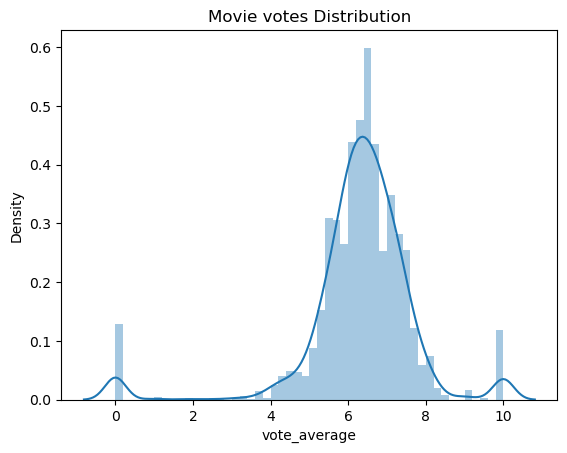

In [40]:
ax = sns.distplot(movies['vote_average'])
ax.set_title('Movie votes Distribution')

In [41]:
movies['Year'] = movies.release_date.apply(lambda x: x.year)
movies['Year']=pd.to_datetime(movies['Year'],format='%Y')
popularity_year=movies.groupby('Year')[['popularity']].mean()
vote_year=movies.groupby('Year')[['vote_count']].mean()
runtime_year=movies.groupby('Year')[['runtime']].mean()

Text(0.5, 1.0, 'Movie popularity over the years')

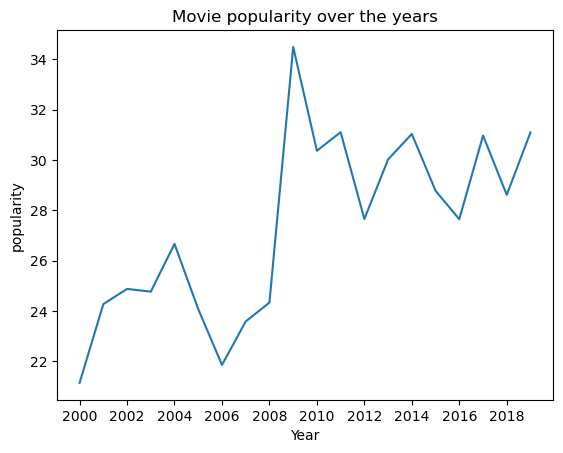

In [42]:
ax = sns.lineplot(data=popularity_year,x='Year',y='popularity')
ax.set_title('Movie popularity over the years')

Text(0.5, 1.0, 'Movie votes over the years')

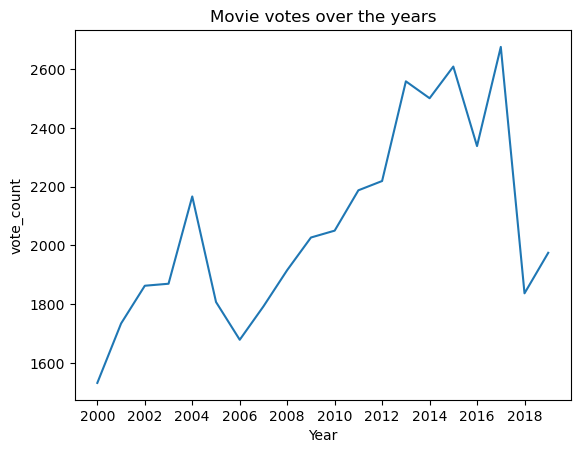

In [43]:
ax = sns.lineplot(data=vote_year,x='Year',y='vote_count')
ax.set_title('Movie votes over the years')

Text(0.5, 1.0, 'Movie runtime over the years')

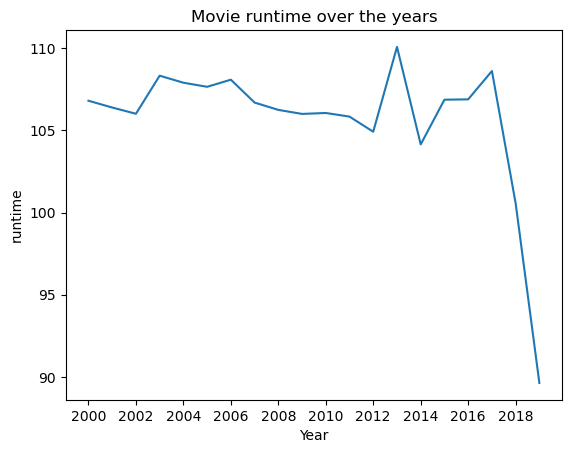

In [44]:
ax = sns.lineplot(data=runtime_year,x='Year',y='runtime')
ax.set_title('Movie runtime over the years')